# **Task 4 EDA**

### **My EDA will be looking into the relation between age, smoking and their affect on charges as well as comparing the discrepency of charges  between different area**

In [1]:
import seaborn as sns
import os
import sys
import matplotlib.pyplot as plt
module_path = os.path.abspath(os.path.join('.'))
if module_path not in sys.path:
    sys.path.append(module_path)
import project_functions

In [2]:
df=  project_functions.load_and_process('medical_expenses.csv')
df

,age,sex,bmi,children,smoker,area,charges
0,18,male,15.96,0,no,NE,1694.80
1,21,female,16.82,1,no,NE,3167.46
2,38,male,16.82,2,no,NE,6640.54
3,26,female,17.20,2,yes,NE,14455.64
4,28,female,17.29,0,no,NE,3732.63
...,...,...,...,...,...,...,...
1333,46,female,48.07,2,no,NE,9432.93
1334,58,male,49.06,0,no,SE,11381.33
1335,23,male,50.38,1,no,SE,2438.06
1336,22,male,52.58,1,yes,SE,44501.40


In [7]:
df.describe(include='all')

,age,sex,bmi,children,smoker,area,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,SE,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663572,1.094918,NaN,NaN,13270.422280
std,14.049960,NaN,6.097951,1.205493,NaN,NaN,12110.011259
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.870000
25%,27.000000,NaN,26.297500,0.000000,NaN,NaN,4740.287500
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.030000
75%,51.000000,NaN,34.692500,2.000000,NaN,NaN,16639.915000


#### *The first impressions we can pull from this and that are of interest are that the mean age is 39 for this study,that the majority of indivuals are male and none smokers and that the older population over 51 yer old has the highest charges (which is expected)*

In [8]:
elderly =df['age'] >= 51
young = df['age']<=27
df[elderly]

#We made 2 dataframe with indivuals over the age of 51 and under the age of 27 

,age,sex,bmi,children,smoker,area,charges
15,51,female,18.05,0,no,NW,9644.25
17,60,female,18.34,0,no,NE,13204.29
18,52,female,18.34,0,no,NW,9991.04
19,57,male,18.34,0,no,NE,11534.87
36,56,male,19.95,0,yes,NE,22412.65
...,...,...,...,...,...,...,...
1327,54,female,46.70,2,no,SW,11538.42
1328,52,female,46.75,5,no,SE,12592.53
1329,54,female,47.41,0,yes,SE,63770.43
1332,52,male,47.74,1,no,SE,9748.91


In [9]:
df[young]

,age,sex,bmi,children,smoker,area,charges
0,18,male,15.96,0,no,NE,1694.80
1,21,female,16.82,1,no,NE,3167.46
3,26,female,17.20,2,yes,NE,14455.64
6,18,male,17.29,2,yes,NE,12829.46
7,23,male,17.39,1,no,NW,2775.19
...,...,...,...,...,...,...,...
1321,27,male,45.90,2,no,SW,3693.43
1324,26,male,46.53,1,no,SE,2927.06
1335,23,male,50.38,1,no,SE,2438.06
1336,22,male,52.58,1,yes,SE,44501.40


In [10]:
smoker=(df['smoker'] == "yes")
elderly =df['age'] >= 51
df[elderly & smoker]

,age,sex,bmi,children,smoker,area,charges
36,56,male,19.95,0,yes,NE,22412.65
63,53,male,20.90,0,yes,SE,21195.82
120,53,female,22.61,3,yes,NE,24873.38
128,53,female,22.88,1,yes,SE,23244.79
133,64,female,22.99,0,yes,SE,27037.91
...,...,...,...,...,...,...,...
1272,59,male,41.14,1,yes,SE,48970.25
1283,52,male,41.80,2,yes,SE,47269.85
1291,57,male,42.13,1,yes,SE,48675.52
1301,51,male,42.90,2,yes,SE,47462.89


In [11]:
young = df['age']<=27
df[smoker & young]

,age,sex,bmi,children,smoker,area,charges
3,26,female,17.20,2,yes,NE,14455.64
6,18,male,17.29,2,yes,NE,12829.46
14,27,female,17.95,2,yes,NE,15006.58
41,27,female,20.05,3,yes,NW,16420.49
53,24,female,20.52,0,yes,NE,14571.89
...,...,...,...,...,...,...,...
1293,18,female,42.24,0,yes,SE,38792.69
1300,23,female,42.75,1,yes,NE,40904.20
1317,19,male,44.88,0,yes,SE,39722.75
1320,25,male,45.54,2,yes,SE,42112.24


In [12]:
project_functions.percentage_elderly_smokers(df)
project_functions.percentage_young_smokers(df)

the percentage of elderly smokers: 17.97752808988764%
the percentage of young smokers: 21.2707182320442%


In [13]:
project_functions.charges_mean(df)
project_functions.charges_mean(df[young])
project_functions.charges_mean(df[elderly])
project_functions.charges_mean(df[smoker &young])
project_functions.charges_mean(df[smoker &  elderly])

the average charges are: 13270.422279521676
the average charges are: 9098.192292817677
the average charges are: 18084.987219101113
the average charges are: 27457.38298701299
the average charges are: 38820.222812500004


#### *We notice here that the average charges of elderly individuals is double the  average charges of young individuals. Furthermore the average charges of young smokers are over triple the average charges of young individuals under 27 and the average charges of elderly smokers are almost 4.5 times than the average charges of elderly individuals.*
#### *We also notice that there is a higher percentage of young smokers compared to elderly smokers.* 

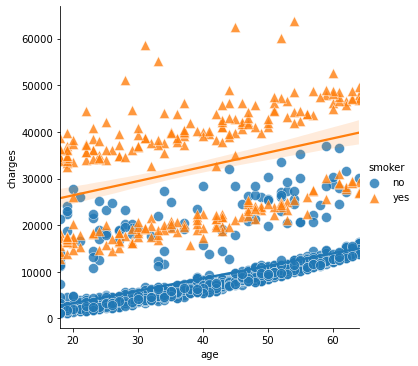

In [3]:
project_functions.lmplot(df)

#### *This regression plot shows that there is a linear trend as the higher the age the higher the charges are. It is quite interesting to note that all individuals with charges higher than 37 000 are all smokers*

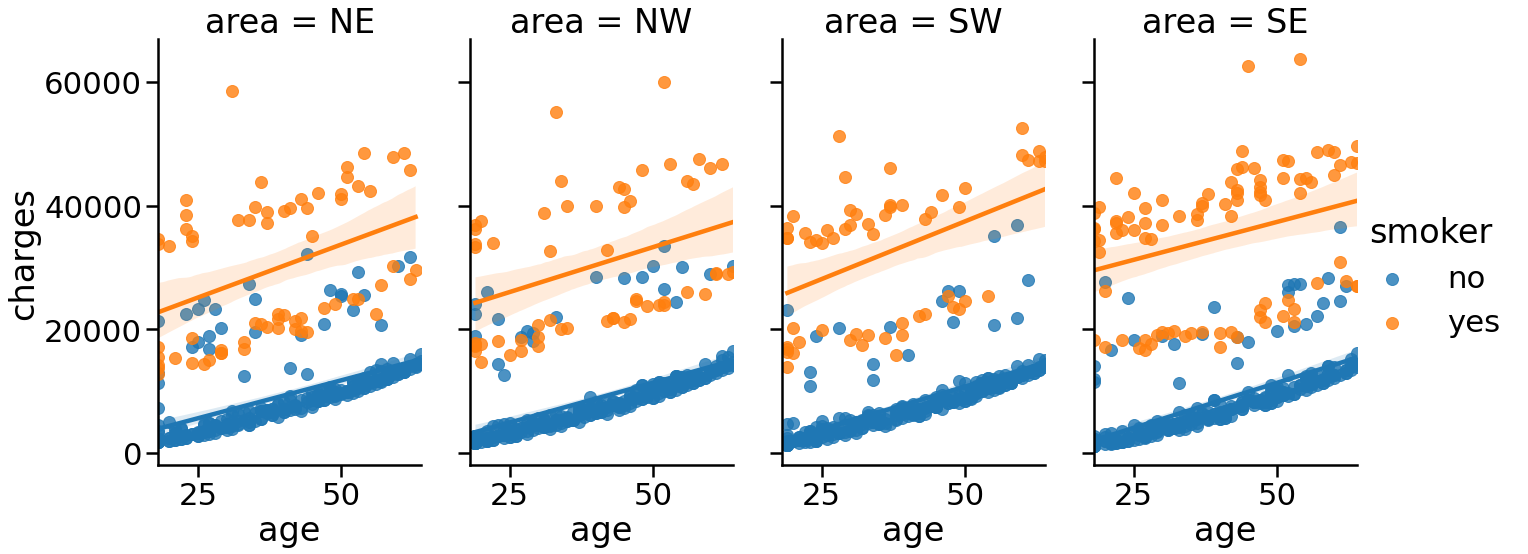

In [4]:
project_functions.lmplot_2(df)

#### *The regression plots for all the areas look similar, it is interesting to note however that the soutwest has the steeper regression line*

<AxesSubplot:xlabel='area', ylabel='charges'>

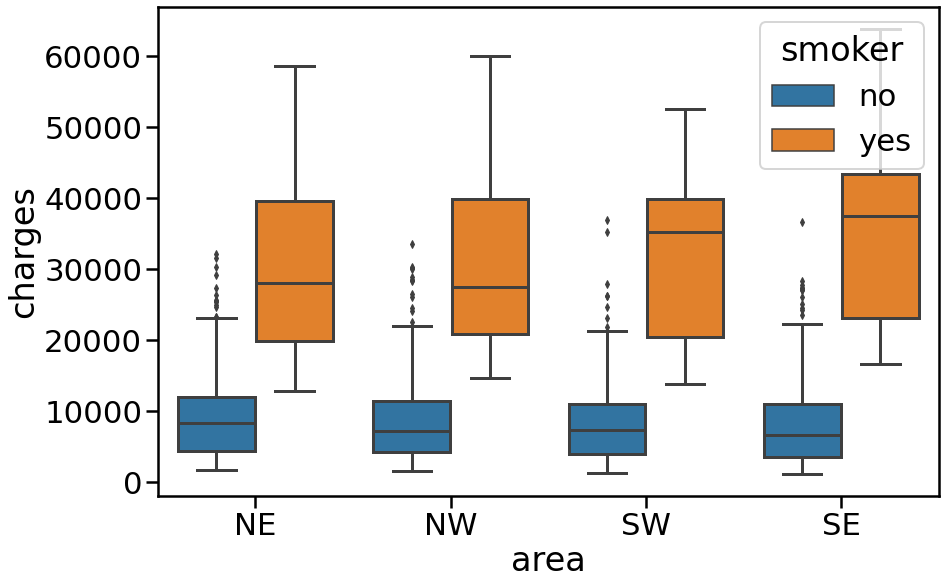

In [13]:
plt.figure(figsize=(14,9))
sns.boxplot(x='area',y='charges',data= df, hue='smoker')

#### *This boxplot tells us that the median charges of smokers in the soutwest and southeast are significantly higher than the median charges of those on the north*

<AxesSubplot:xlabel='count', ylabel='area'>

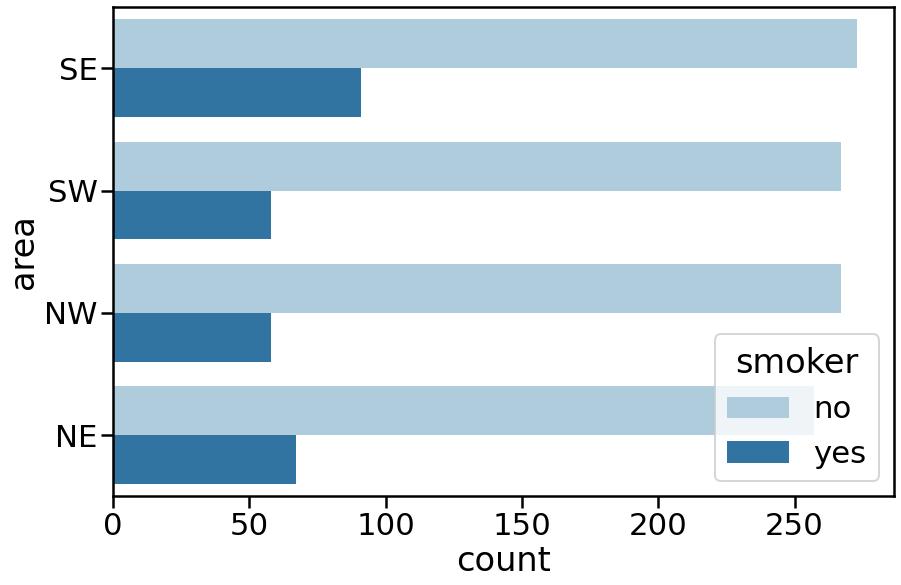

In [14]:
plt.figure(figsize=(14,9))
sns.countplot(y="area", data=df, palette='Paired', order=df['area'].value_counts().index[:5],hue='smoker')

#### *This plot count tells us that the southeast has the highest number of smokers followed by the northeast, which is interesting because the boxplot above showed us that the southwest has a higher charge median than the northeast even tho the northeast has more smokers.* 